## Logistic Regression via Gradient Descent

In [4]:
import numpy as np
import scipy.linalg as linalg


# import time
import numpy as np
from math import e
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#%%

def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes values 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+e**(-X))

def tolerance_check(beta0, beta, eps):
    diff = np.abs(beta0-beta) # norm 
    if np.any(diff>eps): # if norm crosses threshold
        return False
    else:
        return True
    
def Logistics_Regression(X, y, learningrate, eps):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    iterations = 0
    #for i in range(iterations):
    converge = False
    while not converge:
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta1 = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(y_new*np.log(y_pred) + ((1-y_new)*np.log(1-y_pred)))/(len(y_pred))
        converge = tolerance_check(theta,theta1,eps) # checks convergence
        theta = theta1
        iterations += 1
    #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.xlim(0, iterations)
    return theta

**Split Dataset**  

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

dropout = pd.read_csv("../Datasets/schooldropout.csv", sep=";")
dropout['Target'].replace(['Dropout', 'Graduate',"Enrolled"],[0, 1,1], inplace=True)

X = dropout.drop(['Target'],axis=1)
y = dropout[["Target"]]

X_train,X_test,y_train, y_test = train_test_split(X,y ,random_state=100, test_size=0.20, shuffle=True)

**Initial Test**

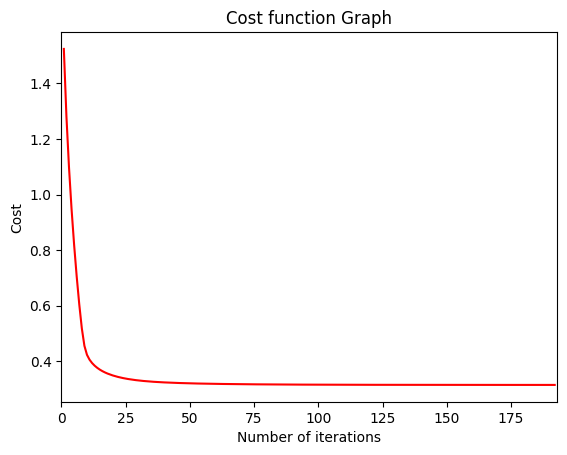

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
eps = 10**(-3)
beta = Logistics_Regression(X_train,y_train, 1, eps)

In [27]:
beta = beta[1:]
beta

array([[ 1.15010720e-01],
       [-2.84910397e-02],
       [-1.21053128e-01],
       [-2.39949812e-01],
       [-6.73258051e-04],
       [ 1.16141256e-01],
       [-7.97586969e-02],
       [-2.69619625e-01],
       [-2.20533703e-01],
       [ 1.31621909e-01],
       [ 3.36776323e-01],
       [-9.04846135e-02],
       [ 6.09600307e-02],
       [-1.44131481e-01],
       [-5.33424972e-02],
       [-1.45469360e-01],
       [ 7.34902190e-01],
       [-1.05443783e-01],
       [ 2.56073935e-01],
       [-3.55212729e-01],
       [ 3.53991952e-01],
       [-2.46501809e-01],
       [-1.20772422e-01],
       [ 9.20228485e-02],
       [ 9.17197754e-01],
       [-3.27907248e-01],
       [ 8.73171121e-02],
       [-4.60491041e-01],
       [-9.45957647e-01],
       [ 1.22160734e-01],
       [ 1.80626494e+00],
       [ 4.44658680e-01],
       [ 8.35030211e-02],
       [-1.62424683e-01],
       [-1.94812210e-02],
       [ 3.80697165e-02]])

**Testing**  
Taken from online resource

In [29]:
def predict_lr(X,y,beta):
    xbeta = np.dot(X,beta)
    predict = np.array(sigmoid_function(xbeta))
    threshold = 0.5*np.ones((predict.shape[0],1))
    pred_class = np.greater(predict,threshold)
    accuracy = np.count_nonzero(np.equal(pred_class, y))/pred_class.shape[0]
    return accuracy, pred_class

In [30]:
acc, predict = predict_lr(X_test,y_test,beta)
acc

0.8610169491525423

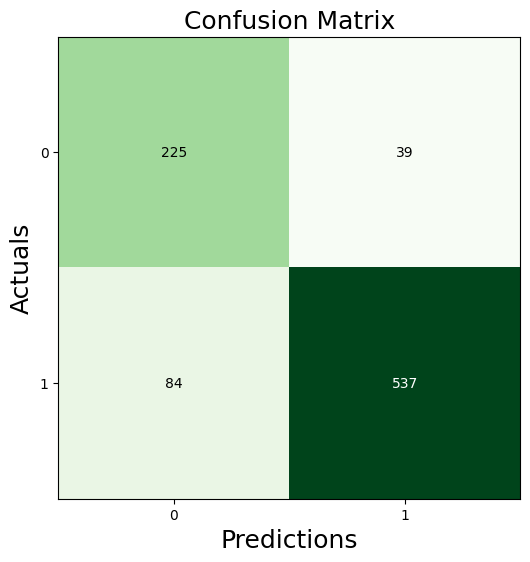

In [31]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = metrics.confusion_matrix(y_test, predict)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Data Analysis Study**

True Dataset

In [ ]:
import time

dropout = pd.read_csv("../Datasets/schooldropout.csv", sep=";")
dropout['Target'].replace(['Dropout', 'Graduate',"Enrolled"],[0, 1,1], inplace=True)

X = dropout.drop(['Target'],axis=1)
y = dropout[["Target"]]

accuracy1 = []
accuracy75 = []
accuracy25 = [] 
accuracy5 = []
accuracy01 = []
time1 = []
time5 = []
time75 = []
time25 = []
time01 = []

for i in range(100):
    X_train,x_test,y_train, y_test = train_test_split(X,y ,random_state = 10+i, test_size=0.20, shuffle=True)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    eps = 10**(-3)

    start_time1 = time.time()
    beta = Logistics_Regression(X_train,y_train, 1, eps)
    end_time1 = time.time()
    timediff1 = end_time1-start_time1
    time1.append(timediff1)
    temp = beta[1:]
    acc = predict_lr(x_test,y_test,temp)
    accuracy1.append(acc)  

In [ ]:
for i in range(100):
    X_train,x_test,y_train, y_test = train_test_split(X,y ,random_state = 10+i, test_size=0.20, shuffle=True)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    eps = 10**(-3)

    start_time75 = time.time()
    beta = Logistics_Regression(X_train,y_train, 0.75, eps)
    end_time75 = time.time()
    timediff75 = end_time75-start_time75
    time75.append(timediff75)
    temp = beta[1:]
    acc = predict_lr(x_test,y_test,temp)
    accuracy75.append(acc)
    

In [ ]:
for i in range(100):
    X_train,x_test,y_train, y_test = train_test_split(X,y ,random_state = 10+i, test_size=0.20, shuffle=True)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    eps = 10**(-3)

    start_time5 = time.time()
    beta = Logistics_Regression(X_train,y_train, 0.5, eps)
    end_time5 = time.time()
    timediff5 = end_time5-start_time5
    time5.append(timediff5)
    temp = beta[1:]
    acc = predict_lr(x_test,y_test,temp)
    accuracy5.append(acc)
    

In [ ]:
for i in range(100):
    X_train,x_test,y_train, y_test = train_test_split(X,y ,random_state = 10+i, test_size=0.20, shuffle=True)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    eps = 10**(-3)

    start_time25 = time.time()
    beta = Logistics_Regression(X_train,y_train, 0.25, eps)
    end_time25 = time.time()
    timediff25 = end_time25-start_time25
    time25.append(timediff25)
    temp = beta[1:]
    acc = predict_lr(x_test,y_test,temp)
    accuracy25.append(acc)


In [ ]:
for i in range(100):
    X_train,x_test,y_train, y_test = train_test_split(X,y ,random_state = 10+i, test_size=0.20, shuffle=True)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    eps = 10**(-3)   
    start_time01 = time.time()
    beta = Logistics_Regression(X_train,y_train, 0.01, eps)
    end_time01 = time.time()
    timediff01 = end_time01-start_time01
    time01.append(timediff01)
    temp = beta[1:]
    acc = predict_lr(x_test,y_test,temp)
    accuracy01.append(acc)

Simulated Study

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

def sim_study(n, d, p=False):
    if p == True:
        beta = np.random.uniform(-10,10,d)
        cat = pd.DataFrame()
        linpred = np.matrix(np.zeros(n))
        for i in range(d):
            var = np.random.uniform(0,10,n)
            var = pd.DataFrame(var)
            cat = pd.concat([cat,var], axis=1)
        for i in range(d):
            x_i=cat.iloc[:,i:i+1].values
            x_i = np.matrix(x_i)
            beta_i = beta[[i]]
            linpred = linpred + x_i*beta_i
        prob = (np.exp(linpred))/(1+np.exp(linpred))
        target = np.random.binomial(1,p=prob[0]).T
        target = pd.DataFrame(target)
    else:
        cat,target = make_classification(n,d,n_classes=2)
    data = pd.concat([cat,target],axis =1)
    return data
data = sim_study(10000,37,p=False)